#### - [지금까지 배운 모든 분류모델] 적용해보기
#### - 독립변수 : 특성을 자유롭게 조합해 가면서 검증해보기
####   (특성을 자유롭게 조합하여 적용해 가면서 정확도 차이 확인)
####   (전체 특성을 모두 적용도 해보세요)
#### - 사용한 모델별로, 예측(predict)을 통한 결과를 ,데이터프레임에 col_predict 컬럼명으로 추가하기

In [1]:
# [문제] 와인데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측
# ** 특성 이름을 담고있는 key 값 = feature_names
# ** 특성 데이터를 담고 있는 key 값 = data
# ** 범주 와인의 종류를 담고 있는 key 값 = target_names
#    - 범주는 'class_0' 과 'class_1'만 사용 ( 0과 1로 변경하여 사용)
#    - (0= 레드와인, 1 = 화이트와인)

# 알콜(Alcohol)
# 말산(Malic acid)
# 회분(Ash)
# 회분의 알칼리도(Alcalinity of ash)
# 마그네슘(Magnesium)
# 총 폴리페놀(Total phenols)
# 폴라보노이드 폴리페놀(Flavanoids)
# 비 폴라보노이드 폴리페놀(Nonflavanoid phenols)
# 프로안토시아닌(Proanthocyanins)
# 색상의 강도(Color intensity)
# 색상(Hue)
# 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
# 프롤린(proline)
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine_all = load_wine()
data = wine_all['data']
print(wine_all)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [2]:
target = wine_all['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [3]:
wine_target =[]
for i in range(len(target)):
    if(target[i] == 0 or target[i] == 1):
        wine_target.append(target[i])
    else:
        pass 
wine_target = np.array(wine_target)
print(len(wine_target))
wine_target

130


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
wine_data=[]
for i in range(len(wine_target)):
    wine_data.append(data[i])
    
wine_data = np.array(wine_data)
len(wine_data)

130

In [5]:
wine = pd.DataFrame(wine_data,columns=['Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','proline'])
wine['class'] = wine_target
wine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


### 데이터 전처리

In [6]:
# 훈련모델 테스트 모델 분류하기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target,test_target = train_test_split(wine_data,wine_target,random_state=701)

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(97, 13)
(97,)
(33, 13)
(33,)


In [7]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 확률적 경사 하강법(SGD) 이용한 분류

In [8]:
## 사용클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss='log', max_iter=10)

# 훈련시키기
sc.fit(train_scaled,train_target)

# 
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

1.0
0.9696969696969697


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [9]:
# 에포크 반복 횟수 찾기 
sc = SGDClassifier(loss='log',random_state =701)

train_score = []
test_score = []

# 범주 고유값 
classes = np.unique(train_target)
# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장 
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target,classes=classes)
    
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_st

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_st

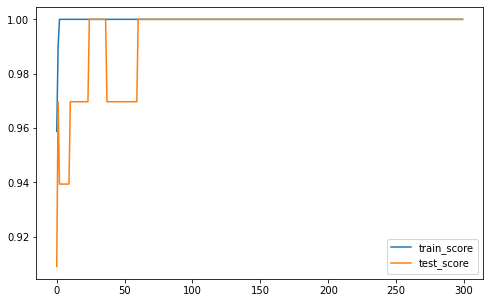

In [10]:
### 최적의 에포크 위치 확인하기 : 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

In [11]:
# 클래스(모델)생성
sc = SGDClassifier(loss='log', max_iter=200)

# 훈련시키기
sc.fit(train_scaled,train_target)

# 결정계수
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

# [해석]
# - 훈련 및 테스트 모두 높은 정확도를 나타내고있다

1.0
1.0


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [12]:
wine_new = wine[['Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','proline']].to_numpy()
pred_wine = ss.transform(wine_new)
wine['class_pred'] = sc.predict(pred_wine)
o_cnt_sgd = len(wine[wine['class']==wine['class_pred']])
x_cnt_sgd = len(wine[wine['class']!=wine['class_pred']])
sum_cnt_sgd = len(wine)
print('[확률적 경사 하강법(SGD)]')
print('총 갯수',sum_cnt_sgd,'건 중에 정답갯수',o_cnt_sgd,'건 오답갯수',x_cnt_sgd)
o_p_sgd = np.round(o_cnt_sgd/sum_cnt_sgd *100, 2)
x_p_sgd = np.round(x_cnt_sgd/sum_cnt_sgd *100, 2)
sum_p_sgd = np.round(sum_cnt_sgd/sum_cnt_sgd*100,2)
print('총{}%중 정답률[{}%], 오답률 [{}%]'.format(sum_p_sgd,o_p_sgd,x_p_sgd))

[확률적 경사 하강법(SGD)]
총 갯수 130 건 중에 정답갯수 130 건 오답갯수 0
총100.0%중 정답률[100.0%], 오답률 [0.0%]


In [13]:
wine[wine['class'] != wine['class_pred']]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline,class,class_pred


In [14]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline,class,class_pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


### 로지스틱 회귀분류

In [15]:
# 객체(모델) 생성하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 훈련모델 생성하기
lr.fit(train_scaled,train_target)

# 훈련모델 분류정확도 확인하기 
# 과적합 여부 확인 위해 훈련 및 테스트 데이터 모두 확인
print('훈련모델 : ',lr.score(train_scaled,train_target))
print('테스트모델 : ',lr.score(test_scaled,test_target))

# 계수 y절편
print('계수, y절편 : ', lr.coef_, lr.intercept_)

# [해석]
# - 훈련 및 테스트 모두 높은 정확도를 나타내고있다

훈련모델 :  1.0
테스트모델 :  0.9696969696969697
계수, y절편 :  [[-1.54774475 -0.54577308 -0.69802129  0.87560222 -0.46003718 -0.15861782
  -0.36512236  0.26680624  0.11008747 -0.66089379  0.02910203 -0.54280948
  -1.68237767]] [0.83571006]


In [16]:
wine_new = wine[['Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','proline']].to_numpy()
pred_wine = ss.transform(wine_new)
wine['class_pred'] = lr.predict(pred_wine)
o_cnt_log = len(wine[wine['class']==wine['class_pred']])
x_cnt_log = len(wine[wine['class']!=wine['class_pred']])
sum_cnt_log = len(wine)
print('[로지스틱 회귀분류]')
print('총 갯수',sum_cnt_log,'건 중에 정답갯수',o_cnt_log,'건 오답갯수',x_cnt_log)
o_p_log = np.round(o_cnt_log/sum_cnt_log *100, 2)
x_p_log = np.round(x_cnt_log/sum_cnt_log *100, 2)
sum_p_log = np.round(sum_cnt_log/sum_cnt_log*100,2)
print('총{}%중 정답률[{}%], 오답률 [{}%]'.format(sum_p_log,o_p_log,x_p_log))



[로지스틱 회귀분류]
총 갯수 130 건 중에 정답갯수 129 건 오답갯수 1
총100.0%중 정답률[99.23%], 오답률 [0.77%]


In [17]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline,class,class_pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


### 결정트리 모델 

In [18]:
# 결정트리 패키지 불러오기
from sklearn.tree import DecisionTreeClassifier

# 클래스 생성하기
# - 실제사용시에는 randon_state는 사용하지 않는것이 좋다
# - random_state값이 변경되면 정확도의 점수도 변경된다
# 훈련모델 생성 
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(train_scaled,train_target)

# 훈련 및 테스트 데이터 정확도 확인하기
print(dtc.score(train_scaled,train_target))
print(dtc.score(test_scaled,test_target))

# [해석]


1.0
0.9696969696969697


In [19]:
wine_new = wine[['Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','proline']].to_numpy()
pred_wine = ss.transform(wine_new)
wine['class_pred'] = dtc.predict(pred_wine)
o_cnt_tree = len(wine[wine['class']==wine['class_pred']])
x_cnt_tree = len(wine[wine['class']!=wine['class_pred']])
sum_cnt_tree = len(wine)
print('[결정트리모델]')
print('총 갯수',sum_cnt_tree,'건 중에 정답갯수',o_cnt_tree,'건 오답갯수',x_cnt_tree)
o_p_tree = np.round(o_cnt_tree/sum_cnt_tree *100, 2)
x_p_tree = np.round(x_cnt_tree/sum_cnt_tree *100, 2)
sum_p_tree = np.round(sum_cnt_tree/sum_cnt_tree*100,2)
print('총{}%중 정답률[{}%], 오답률 [{}%]'.format(sum_p_tree,o_p_tree,x_p_tree))

[결정트리모델]
총 갯수 130 건 중에 정답갯수 129 건 오답갯수 1
총100.0%중 정답률[99.23%], 오답률 [0.77%]


In [20]:
wine[wine['class'] != wine['class_pred']]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline,class,class_pred
73,12.99,1.67,2.6,30.0,139.0,3.3,2.89,0.21,1.96,3.35,1.31,3.5,985.0,1,0


In [21]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline,class,class_pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


#### 특성 중요도

In [22]:
print(dtc.feature_importances_)

[0.16417402 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.83582598]


In [33]:
# 독립변수, 종속변수 나누기
# 독립변수 2차원, 종속변수 1차원
wine_input = wine[['Alcohol','proline']].to_numpy()
wine_target = wine[['class']].to_numpy()

# 훈련데이터, 테스트데이터 분류 
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(wine_data, wine_target,random_state=701)
print('훈련-입력 : ', train_input.shape)
print('훈련-타겟 : ',train_target.shape)
print('테스트-입력 : ',test_input.shape)
print('테스트-타겟 :',test_target.shape)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 스스로 표준점수 생성 
# 타겟 데이터는 절대 정규화 XXXXXX 
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier()
dtc.fit(train_scaled,train_target)

print(dtc.score(train_scaled,train_target))
print(dtc.score(test_scaled,test_target))

훈련-입력 :  (97, 13)
훈련-타겟 :  (97, 1)
테스트-입력 :  (33, 13)
테스트-타겟 : (33, 1)
1.0
0.9696969696969697


In [34]:
wine_new = wine[['Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','proline']].to_numpy()
pred_wine = ss.transform(wine_new)
wine['class_pred'] = dtc.predict(pred_wine)
o_cnt = len(wine[wine['class']==wine['class_pred']])
x_cnt = len(wine[wine['class']!=wine['class_pred']])
sum_cnt = len(wine)
print('[결정트리 모델에서 특성중요도에 따른 특정 독립변수만 추출후 재실행]')
print('총 갯수',sum_cnt,'건 중에 정답갯수',o_cnt,'건 오답갯수',x_cnt)
o_p = np.round(o_cnt/sum_cnt *100, 2)
x_p = np.round(x_cnt/sum_cnt *100, 2)
sum_p = np.round(sum_cnt/sum_cnt*100,2)
print('총{}%중 정답률[{}%], 오답률 [{}%]'.format(sum_p,o_p,x_p))

[결정트리 모델에서 특성중요도에 따른 특정 독립변수만 추출후 재실행]
총 갯수 130 건 중에 정답갯수 129 건 오답갯수 1
총100.0%중 정답률[99.23%], 오답률 [0.77%]


### KNN 최근접 이웃모델

In [25]:
from sklearn.neighbors import KNeighborsRegressor

### 클래스(모델) 이름 :KNeighborsRegressor()
knr = KNeighborsRegressor()
knr.fit(train_scaled,train_target)
print(knr.score(train_scaled, train_target))
print(knr.score(test_scaled,test_target))

# [해석]
# 훈련모델 테스트모델 결정계수가 모두 낮은값
# 전체적으로 과소적합 

0.9451105216622459
0.7664615384615385


In [35]:
wine_new = wine[['Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','proline']].to_numpy()
pred_wine = ss.transform(wine_new)
wine['class_pred'] = knr.predict(pred_wine)
o_cnt_knn = len(wine[wine['class']==wine['class_pred']])
x_cnt_knn = len(wine[wine['class']!=wine['class_pred']])
sum_cnt_knn = len(wine)
print('[KNN 모델]')
print('총 갯수',sum_cnt_knn,'건 중에 정답갯수',o_cnt_knn,'건 오답갯수',x_cnt_knn)
o_p_knn = np.round(o_cnt_knn/sum_cnt_knn *100, 2)
x_p_knn = np.round(x_cnt_knn/sum_cnt_knn *100, 2)
sum_p_knn = np.round(sum_cnt_knn/sum_cnt_knn*100,2)
print('총{}%중 정답률[{}%], 오답률 [{}%]'.format(sum_p_knn,o_p_knn,x_p_knn))

[KNN 모델]
총 갯수 130 건 중에 정답갯수 109 건 오답갯수 21
총100.0%중 정답률[83.85%], 오답률 [16.15%]


In [27]:
wine[wine['class'] != wine['class_pred']]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline,class,class_pred
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0,0,0.2
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0,0.2
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,0,0.2
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0,0,0.2
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0,0.2
43,13.24,3.98,2.29,17.5,103.0,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680.0,0,0.2
50,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.0,0,0.2
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1,0.8
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1,0.4
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0,1,0.4


# [해석]
#### ***[확률적 경사 하강법(SGD)]
##### 총 갯수 130 건 중에 정답갯수 128 건 오답갯수 2
##### 총100.0%중 정답률[98.46%], 오답률 [1.54%]

#### ***[로지스틱 회귀분류]
##### 총 갯수 130 건 중에 정답갯수 129 건 오답갯수 1
##### 총100.0%중 정답률[99.23%], 오답률 [0.77%]

#### ***[결정트리모델]
##### 총 갯수 130 건 중에 정답갯수 129 건 오답갯수 1
##### 총100.0%중 정답률[99.23%], 오답률 [0.77%]


#### ***[결정트리 모델에서 특성중요도에 따른 특정 독립변수만 추출후 재실행]
##### 총 갯수 130 건 중에 정답갯수 129 건 오답갯수 1
#### #총100.0%중 정답률[99.23%], 오답률 [0.77%]

#### ***[KNN 모델]
##### 총 갯수 130 건 중에 정답갯수 109 건 오답갯수 21
##### 총100.0%중 정답률[83.85%], 오답률 [16.15%]

#### >>결과값에 따라서 분류를 위해서는 로지스틱 회귀분류나 결정트리모델을 사용하는것이 좋다고 본다.